In [37]:
include("helper.jl")
include("algorithms.jl")

# For autoreload file
#using Revise
#import helper

run_experiment (generic function with 4 methods)

In [38]:
Threads.nthreads()

8

In [41]:
@time begin

    N = 1000
    nb_iters = 30000
    nb_exp = 100
    x_star = generate_x(N)
    a = 5
    b = 1

    overlap_hat_metropolis = run_experiment(N, a, b,
        x_star, metropolis, nb_iters, nb_exp)
end

 20.237996 seconds (50.95 M allocations: 79.494 GiB, 23.07% gc time)


1×30000 Matrix{Float64}:
 0.02148  0.02158  0.02152  0.02188  …  0.05394  0.05394  0.05394  0.05394

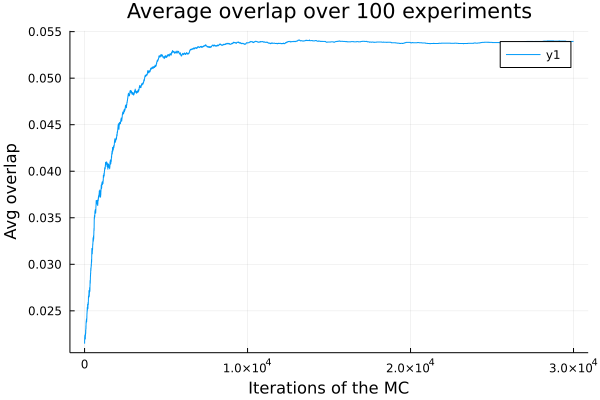

In [42]:
visualize_overlap(overlap_hat_metropolis[1, :], nb_exp)